# Allgemeine Imports

In [1]:
# Alle Imports
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import numpy as np
from datetime import timedelta, date
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(42)
# Später wird Decision Tree genutzt
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics

In [2]:
# Parameter für den Plot
SMALL_SIZE = 20
MEDIUM_SIZE = 20
BIGGER_SIZE = 25
plt.rcParams["figure.figsize"] = (20,10)
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [3]:
# Daten von der angegebenen Website runterladen
df = fetch_ucirepo(id=222).data.original
# Transformation der Zielvariable in ein binäres Format, damit der Mittelwert genutzt werden kann
df['y'] = np.where(df['y'] == 'yes', 1, 0)
# Weitere Transformationen binärer Informationen
df['default'] = np.where(df['default'] == 'yes', 1, 0)
df['housing'] = np.where(df['housing'] == 'yes', 1, 0)
df['loan'] = np.where(df['loan'] == 'yes', 1, 0)

# Explorative Datenanalyse

In [4]:
# Datensatz ausgeben und ansehen
df

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,NaN,5,may,261,1,-1,0,NaN,0
1,44,technician,single,secondary,0,29,1,0,NaN,5,may,151,1,-1,0,NaN,0
2,33,entrepreneur,married,secondary,0,2,1,1,NaN,5,may,76,1,-1,0,NaN,0
3,47,blue-collar,married,NaN,0,1506,1,0,NaN,5,may,92,1,-1,0,NaN,0
4,33,NaN,single,NaN,0,1,0,0,NaN,5,may,198,1,-1,0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,0,825,0,0,cellular,17,nov,977,3,-1,0,NaN,1
45207,71,retired,divorced,primary,0,1729,0,0,cellular,17,nov,456,2,-1,0,NaN,1
45208,72,retired,married,secondary,0,5715,0,0,cellular,17,nov,1127,5,184,3,success,1
45209,57,blue-collar,married,secondary,0,668,0,0,telephone,17,nov,508,4,-1,0,NaN,0


In [5]:
# Für alle Ausprägungen Berechnung des Mittelswerts (sofern möglich) und Aufschlüsselung der Ausprägungen 
# nach Häufigkeit und durchschnittliche Abschlussrate für ein Gefühl der Daten
for col in df.columns:
    print(col)
    try:
        print(df[col].mean())
    except:
        pass
    if col != 'y':
        print(df.fillna('leer').groupby(col).agg({col:'size', 'y':'mean'}).rename({col:'count','y':'mean_y'}, axis = 1).reset_index().sort_values(by = 'count', ascending = False))
        print('\n\n')

age
40.93621021432837
    age  count    mean_y
14   32   2085  0.105995
13   31   1996  0.103206
15   33   1972  0.106491
16   34   1930  0.102591
17   35   1894  0.110348
..  ...    ...       ...
72   90      2  1.000000
73   92      2  1.000000
74   93      2  1.000000
76   95      2  0.500000
75   94      1  0.000000

[77 rows x 3 columns]



job
              job  count    mean_y
1     blue-collar   9732  0.072750
5      management   9458  0.137556
10     technician   7597  0.110570
0          admin.   5171  0.122027
8        services   4154  0.088830
6         retired   2264  0.227915
7   self-employed   1579  0.118429
2    entrepreneur   1487  0.082717
11     unemployed   1303  0.155027
3       housemaid   1240  0.087903
9         student    938  0.286780
4            leer    288  0.118056



marital
    marital  count    mean_y
1   married  27214  0.101235
2    single  12790  0.149492
0  divorced   5207  0.119455



education
   education  count    mean_y
2  secondary  23202  0.

age


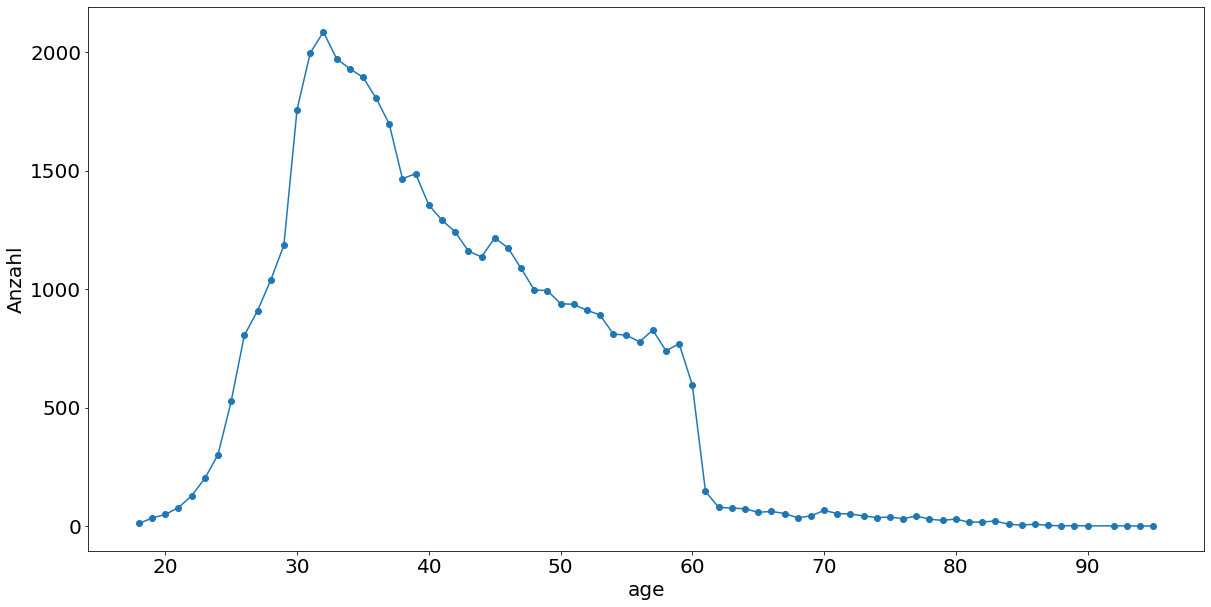

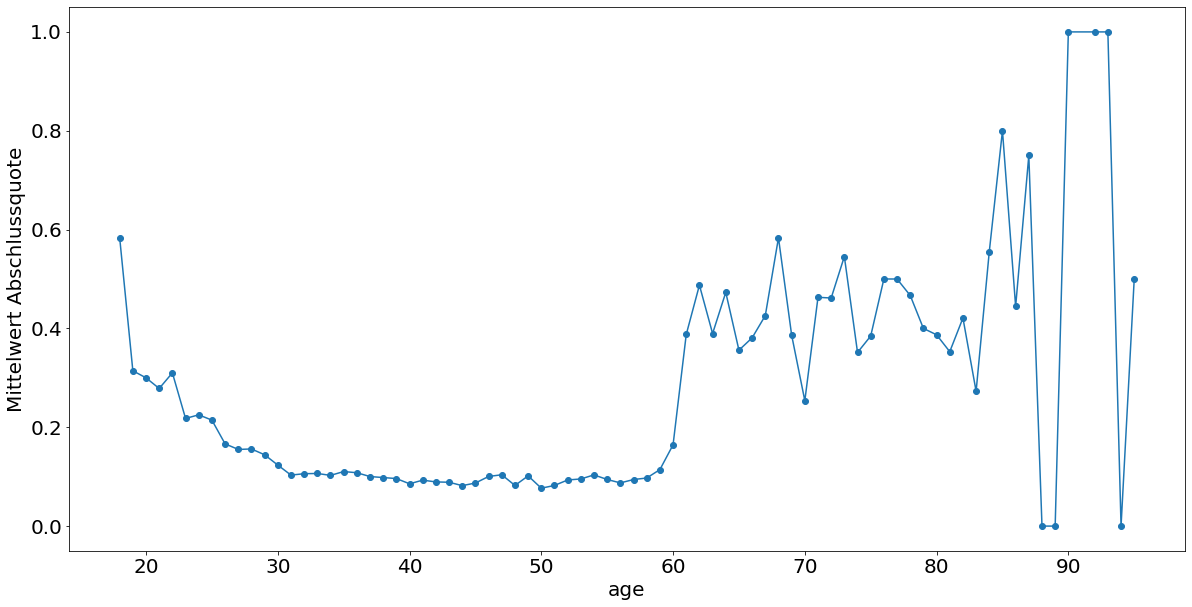

campaign


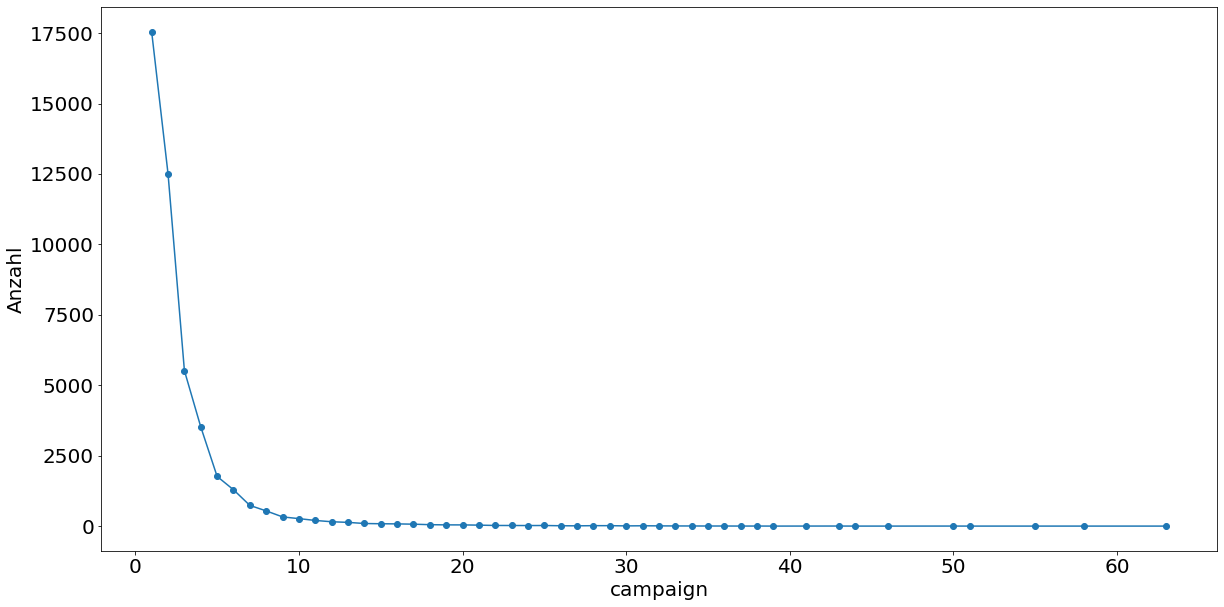

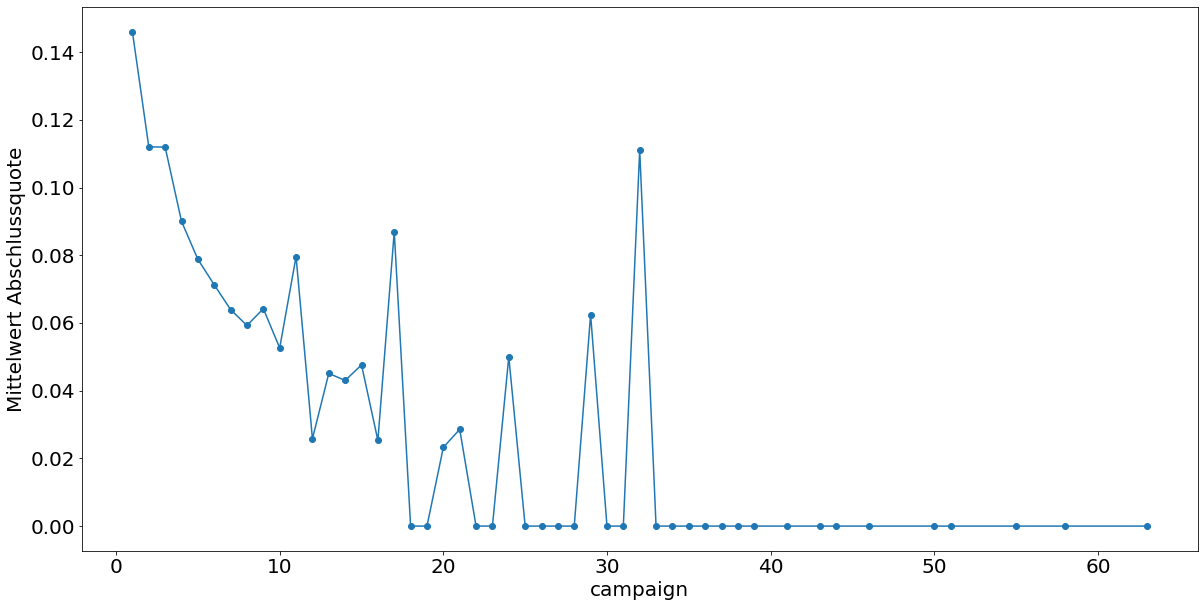

In [6]:
# Visuelle Darstellung für Alter und Anzahl Kontakte
for col in ['age', 'campaign']:
    print(col)
    df_plot = df.fillna('leer').groupby(col).agg({col:'size', 'y':'mean'}).rename({col:'count','y':'mean_y'}, axis = 1).reset_index().sort_values(by = col)
    plt.plot(df_plot[col], df_plot['count'], 'o-')
    plt.xlabel(col)
    plt.ylabel('Anzahl')
    plt.show()
    plt.plot(df_plot[col], df_plot['mean_y'], 'o-')
    plt.xlabel(col)
    plt.ylabel('Mittelwert Abschlussquote')
    plt.show()

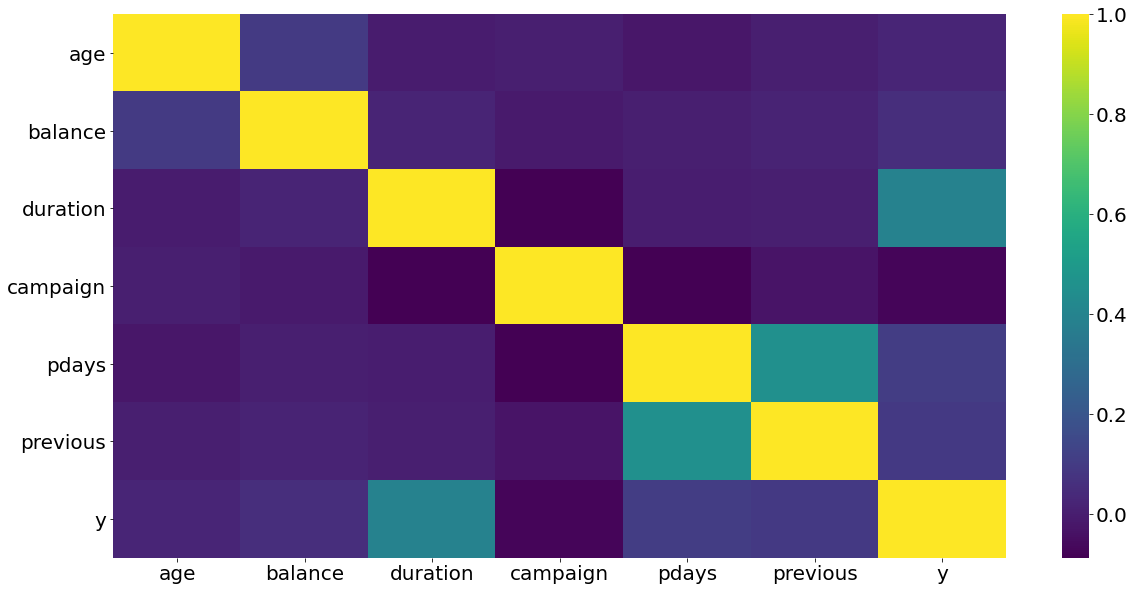

In [7]:
# Korrelationsmatrix für ein paar meist stetige Variablen
sns.heatmap(df[['age', 'balance', 'duration', 'campaign','pdays','previous', 'y']].corr(), cmap = "viridis");

## Erkenntnisse der explorativen Datenanalyse: 
Studenten und Rentner sind affiner für Festgeld, während Selbständige, blue-collar und service Kräfte weniger affin sind. Auch in der Altersverteilung ist zu sehen, dass junge und alte Kunden affiner für Festgeld sind, jedoch gibt es in diesen Altersklassen auch weniger Kunden. Je höher die Bildung, desto affiner sind die Kunden. Bei Kredit in Verzug oder allgemein Kredit sind die Kunden auch weniger affin für Festgeld. Kunden ohne eigenes Haus sind ebenfalls affiner für Festgeld. \
Je länger die Dauer des Anrufs ist, desto wahrscheinlicher war ein Abschluss. Je öfters angerufen wird, desto geringer ist die Chance eines Verkaufs. Je höher das Einkommen war, desto wahrscheinlicher war im Durchschnitt ein Abschluss. Auch bei vorherigen Kontakten stieg die Wahrscheinlichkeit eines Abschlusses, hier vermute ich aber auch, dass beim Vorabkontakt eine geeignete Vorauswahl der Kunden stattgefunden hat. Bei Kunden, bei welchen eine vorherige Werbekampagne erfolgreich war, war zu 64,7 % auch diese erfolgreich. \
Der Zeitpunkt könnte noch weiter untersucht werden, aus Zeitgründen wird erstmal darauf verzichet.

# Modellierung
Erstellung eines Datensatzes fürs Modell

In [8]:
# Entfernung der Zeitangabe und contact, da leere Werte zu häufig waren und hoch korreliert waren mit keinem Erfolg
df_mod = df.drop(['contact', 'day_of_week', 'month'], axis = 1)
# Verwandle Jobs, Beziehungsstatus, Bildung und Erfolg letzer Kampagne in binäre Variablen fürs Modell
df_mod = pd.get_dummies(df_mod, columns = ['job', 'marital', 'education', 'poutcome'])
# Wie sieht der neue Datensatz aus?
df_mod

,age,default,balance,housing,loan,duration,campaign,pdays,previous,y,...,job_unemployed,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,poutcome_failure,poutcome_other,poutcome_success
0,58,0,2143,1,0,261,1,-1,0,0,...,0,0,1,0,0,0,1,0,0,0
1,44,0,29,1,0,151,1,-1,0,0,...,0,0,0,1,0,1,0,0,0,0
2,33,0,2,1,1,76,1,-1,0,0,...,0,0,1,0,0,1,0,0,0,0
3,47,0,1506,1,0,92,1,-1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,33,0,1,0,0,198,1,-1,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,977,3,-1,0,1,...,0,0,1,0,0,0,1,0,0,0
45207,71,0,1729,0,0,456,2,-1,0,1,...,0,1,0,0,1,0,0,0,0,0
45208,72,0,5715,0,0,1127,5,184,3,1,...,0,0,1,0,0,1,0,0,0,1
45209,57,0,668,0,0,508,4,-1,0,0,...,0,0,1,0,0,1,0,0,0,0


Erstellung Test- und Trainingsdaten

In [9]:
X = df_mod.drop(['y'], axis = 1)
y = df_mod['y'].values
# 50/50 aus persönlicher Preferenz
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5)

Erster Testlauf Modell (Decision Tree)

In [10]:
# Modell aufstellen 
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [11]:
df_mod['predict'] = clf.predict(X)
df_mod['diff_abs'] = abs(df_mod['predict'] - df_mod['y'])
df_mod['diff'] = df_mod['predict'] - df_mod['y']
y_pred = clf.predict(X_test)
print(df_mod['diff_abs'].mean())
print(df_mod['diff'].mean())
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

0.07336710092676561
0.00378226537789476
Accuracy: 0.8532690436167389


Accuarcy ist mit 0,85 schon sehr hoch. Es wird jetzt für verschiedene Parameter das Modell noch gefittet und geprüft, ob diese verbessert werden kann. Das Ganze wird in einem Pandas Dataframe gespeichert. 

In [12]:
df_res = pd.DataFrame()
for depth in range(3, 15):
    for inp in [0.00001, 0.0001, 0.001,0.01,0.1]:
        for crit in ["gini","entropy"]:
            clf = DecisionTreeClassifier(criterion = crit,min_impurity_decrease=inp,max_depth=depth, random_state=0)
            clf = clf.fit(X_train, y_train)
            y_pred = clf.predict(X_test)
            y_pred_train = clf.predict(X_train)
            # print(depth, inp, crit)
            # print("Accuracy Test:",metrics.accuracy_score(y_test, y_pred))
            # print("Accuracy Train:",metrics.accuracy_score(y_train, y_pred_train))
            df_res = df_res.append({'depth': depth, 'inp': inp, 'crit': crit, 
                           'Test_acc': metrics.accuracy_score(y_test, y_pred),
                          'Train_acc': metrics.accuracy_score(y_train, y_pred_train)}, ignore_index = True)

In [13]:
# Sortiere den Ergebnis Datensatz nach bester Test Accuracy
df_res.sort_values(by = ['Test_acc', 'Train_acc'], ascending = False)

,Test_acc,Train_acc,crit,depth,inp
22,0.899319,0.907498,gini,5.0,0.00010
32,0.899275,0.908560,gini,6.0,0.00010
20,0.899230,0.907720,gini,5.0,0.00001
0,0.899230,0.901659,gini,3.0,0.00001
2,0.899230,0.901659,gini,3.0,0.00010
...,...,...,...,...,...
99,0.882288,0.883743,entropy,12.0,0.10000
108,0.882288,0.883743,gini,13.0,0.10000
109,0.882288,0.883743,entropy,13.0,0.10000
118,0.882288,0.883743,gini,14.0,0.10000


Es ist zu sehen, dass eine hohe Accuracy mit verschiedenen Parametern erreicht werden kann. Für die bessere Übersicht wird das Modell auf Platz 5 (Index 2) im Folgenden ausgewählt.

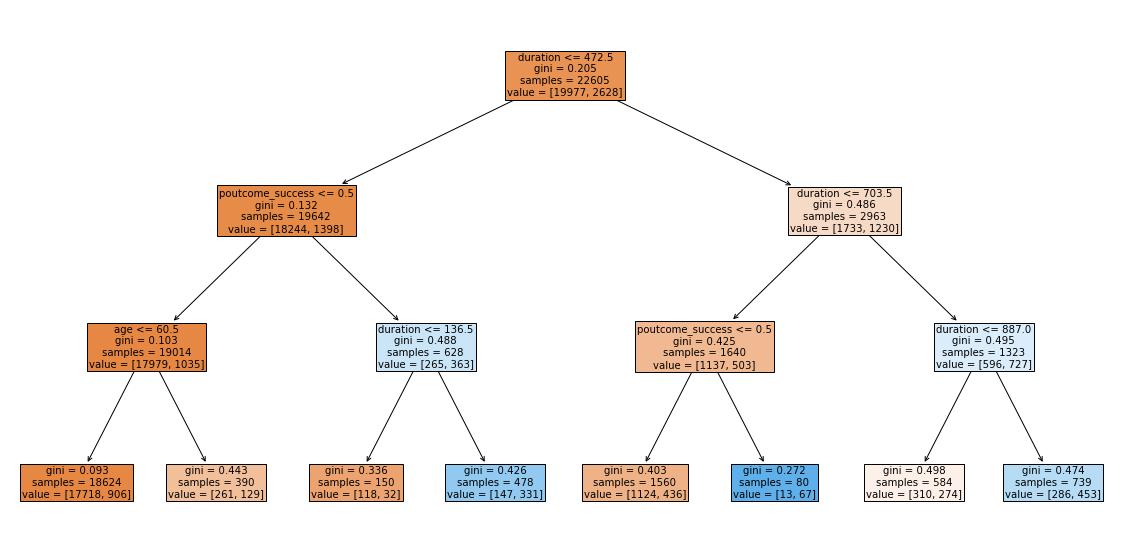

In [14]:
# Modell fitten
mod = tree.DecisionTreeClassifier(criterion = 'gini', min_impurity_decrease = 0.00001, max_depth = 3, random_state = 0)
mod = mod.fit(X_train, y_train)
plot_tree(mod, filled = True, feature_names=['age', 'default', 'balance', 'housing', 'loan', 'duration', 'campaign',
       'pdays', 'previous', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'marital_divorced', 'marital_married',
       'marital_single', 'education_primary', 'education_secondary',
       'education_tertiary', 'poutcome_failure', 'poutcome_other',
       'poutcome_success']); 

In [15]:
# andere Darstellung
from sklearn.tree import export_text
r = export_text(mod, feature_names=['age', 'default', 'balance', 'housing', 'loan', 'duration', 'campaign',
       'pdays', 'previous', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'marital_divorced', 'marital_married',
       'marital_single', 'education_primary', 'education_secondary',
       'education_tertiary', 'poutcome_failure', 'poutcome_other',
       'poutcome_success'])
print(r)

|--- duration <= 472.50
|   |--- poutcome_success <= 0.50
|   |   |--- age <= 60.50
|   |   |   |--- class: 0
|   |   |--- age >  60.50
|   |   |   |--- class: 0
|   |--- poutcome_success >  0.50
|   |   |--- duration <= 136.50
|   |   |   |--- class: 0
|   |   |--- duration >  136.50
|   |   |   |--- class: 1
|--- duration >  472.50
|   |--- duration <= 703.50
|   |   |--- poutcome_success <= 0.50
|   |   |   |--- class: 0
|   |   |--- poutcome_success >  0.50
|   |   |   |--- class: 1
|   |--- duration >  703.50
|   |   |--- duration <= 887.00
|   |   |   |--- class: 0
|   |   |--- duration >  887.00
|   |   |   |--- class: 1



Es ist zu sehen, nach welchen Kriteren das Modell entscheidet. Die wichtigsten Parameter sind die Länge des Anrufs, der Erfolg vergangener Werbekampagnen und das Alter. 

# Weiterführend
## Weitere Modellierungen
Weiterführend kann man die vorhandenen Daten noch weiter analysieren und Zusammenhänge finden. Insbesondere könnte man die Zeitdaten noch betrachten und hier Variablen, wie Tag der Woche oder Jahreszeit einfügen. So gibt es im Kundenverhalten auch bestimmte Muster zu sehen, so werden z.B. zu Beginn des Jahres mehr Ratenkredite abgeschlossen. \
Das Modell kann noch weiter geprüft werden, auch hinsichtlich Overfitting oder Nutzung eines anderen Modells, welches passender für die Daten ist, z.B. Regression, XGBoost. 
# Fragen
## Würden Sie für die Voraussage noch weitere Datenpunkte in Erwägung ziehen? 
Ja, die oben beschriebenen Zeitdaten wären auch noch spannend, auch hinsichtlich der Kontaktuhrzeit. So könnte zum Beispiel auch die höhere Abschlussquoten auch mit der Verfügbarkeit der Kunden zu tun haben, so hatten Studenten und Renter ja höhere Quoten, was ggfs. auch dadurch erklärbar wäre, dass zu Arbeitszeiten angerufen wurde. \
Auch könnte man weitere Infos zum bisherigen Produktbesitz und Umsatz miteinfließen lassen. Wenn zum Beispiel angerufen wurde, als gerade ein vorheriges Festgeld ausgelaufen ist oder eine größere Menge Geld aufs Konto geflossen ist, so könnte das einen guten Ansprachezeitpunkt indizieren. \
Generell sind Kontaktzeitpunkte immer gut gewählt, wenn für Kunden sich Änderungen in seinen Lebensumständen entwickeln. Hierfür kann man als Bank Stammdatenänderungen (z.B. neuer Name, neue Adresse) oder auch Umsätze (z.B. für Jobbeginn, Gehaltserhöhung) berücksichtigen. 
## Können die Erkenntnisse Ihrer Analyse auch für andere Bereiche der Bank verwendet werden? 
Allgemein alle Korrelationen zwischen den Daten, welche auch einen Grund haben, können verwendet werden, um Kunden gezielter zu kontaktieren und benötigte Produkte vorzuschlagen und ggfs. auch entwickeln. Man kann ja ggfs. alle Variablen gegeneinander auftragen und betrachten. Zum Beispiel Bildung, Job und Einkommen um hier z.B. auch gesamtgesellschaftliche Zusammenhänge und Änderungen näher zu betrachten. \
Hierfür würde ich die Daten entsprechend meiner Anforderungen ummodellieren und ggfs. auch neue Datenquellen erschließen und anbinden. 